# **Employee Attrition analysis**

**Problem Statement:**

XYZ company which was established a few years back is facing around a 15% attrition rate for
a couple of years. And it's majorly affecting the company in many aspects. In order to
understand why employees are leaving the company and reduce the attrition rate XYZ
company has approached an HR analytics consultancy for analyzing the data they have. You
are playing the HR analyst role in this project and building a dashboard which can help the
organization in making data-driven decisions.

## **Loading the dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Attrition data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
df.shape

(4410, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

# **Data Cleaning**

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
df.dropna()
df.shape

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

**Finding the uniqueness of attributes**

In [ ]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
 df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [ ]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

# **Dropping Columns**

In [10]:
df = df.drop(columns=['Over18','StandardHours','EmployeeCount','StockOptionLevel','TrainingTimesLastYear','BusinessTravel'])
df.head()


,EmployeeID,Age,Attrition,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,11,1.0,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,23,6.0,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Research & Development,17,4,Other,Male,4,Sales Executive,...,15,5.0,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,11,13.0,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Research & Development,10,1,Medical,Male,1,Sales Executive,...,12,9.0,6,0,4,4.0,1.0,3.0,3,3


We are removing the **Over18, StandardHour, EmployeeCount , StockOptionLevel , TrainingTimesLastYear** and **bussiness Travel** column as they are not significant for driving
 necessary insights.

In [11]:
df.shape

(4410, 23)

# **Descriptive statitics**

In [12]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,11.279936,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,7.782222,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [13]:
employee_df_numeric= df.select_dtypes(include='number')
employee_df_numeric

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,6,2,1,131160,1.0,11,1.0,1,0,0,3.0,4.0,2.0,3,3
1,2,31,10,1,1,41890,0.0,23,6.0,5,1,4,3.0,2.0,4.0,2,4
2,3,32,17,4,4,193280,1.0,15,5.0,5,0,3,2.0,2.0,1.0,3,3
3,4,38,2,5,3,83210,3.0,11,13.0,8,7,5,4.0,4.0,3.0,2,3
4,5,32,10,1,1,23420,4.0,12,9.0,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,5,4,1,60290,3.0,17,10.0,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,2,4,1,26790,2.0,15,10.0,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,25,2,2,37020,0.0,20,5.0,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,18,2,1,23980,0.0,14,10.0,9,7,8,4.0,1.0,3.0,2,3


# **Correlation**
Correlation indicates how closely the
movements of one variable are associated with the movements of another variable.

Range of Correlation : **-1 to 1** i.e 0.8 indicates stronger correlation & 0.3 indicates weaker correlation.

In [14]:
correlation=employee_df_numeric.corr()
correlation

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,1.000000,0.008649,-0.001097,-0.009680,-0.003303,0.007338,-0.001117,-0.004456,-0.001063,0.004086,0.000256,0.008579,0.000798,-0.001053,-0.001723,0.008591,-0.006892
Age,0.008649,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299243,-0.033137,0.680661,0.311309,0.216513,0.202089,0.010089,-0.003086,-0.021297,0.018196,-0.025563
DistanceFromHome,-0.001097,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013843,0.038125,0.009374,0.031684,0.002290,0.021584,0.020183,-0.011144,0.008000,-0.001837,0.036418
Education,-0.009680,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016250,-0.040531,-0.010717,0.006080,0.022490,0.005358,-0.045469,-0.004173,-0.006406,-0.018279,-0.035591
JobLevel,-0.003303,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.009875,0.010973,-0.036957,-0.064219,-0.060811,-0.055251,-0.024448,-0.018279,-0.027664,-0.012630,-0.002474
MonthlyIncome,0.007338,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020726,0.004325,-0.033787,0.000995,0.065219,0.024304,-0.006006,0.005063,0.003572,0.023346,0.016093
NumCompaniesWorked,-0.001117,0.299243,-0.013843,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.238807,-0.117959,-0.036656,-0.109667,0.013007,-0.056230,-0.008714,0.027985,0.017819
PercentSalaryHike,-0.004456,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.030860,1.000000,-0.018736,-0.029707,-0.029542,-0.040864,0.000841,0.030808,-0.040601,-0.004658,0.773550
TotalWorkingYears,-0.001063,0.680661,0.009374,-0.010717,-0.036957,-0.033787,0.238807,-0.018736,1.000000,0.627703,0.404444,0.458800,-0.002265,-0.016849,0.001119,0.006709,-0.001396
YearsAtCompany,0.004086,0.311309,0.031684,0.006080,-0.064219,0.000995,-0.117959,-0.029707,0.627703,1.000000,0.618409,0.769212,0.000421,-0.002166,0.014704,0.008314,-0.011038


<Axes: title={'center': 'Correlation'}>

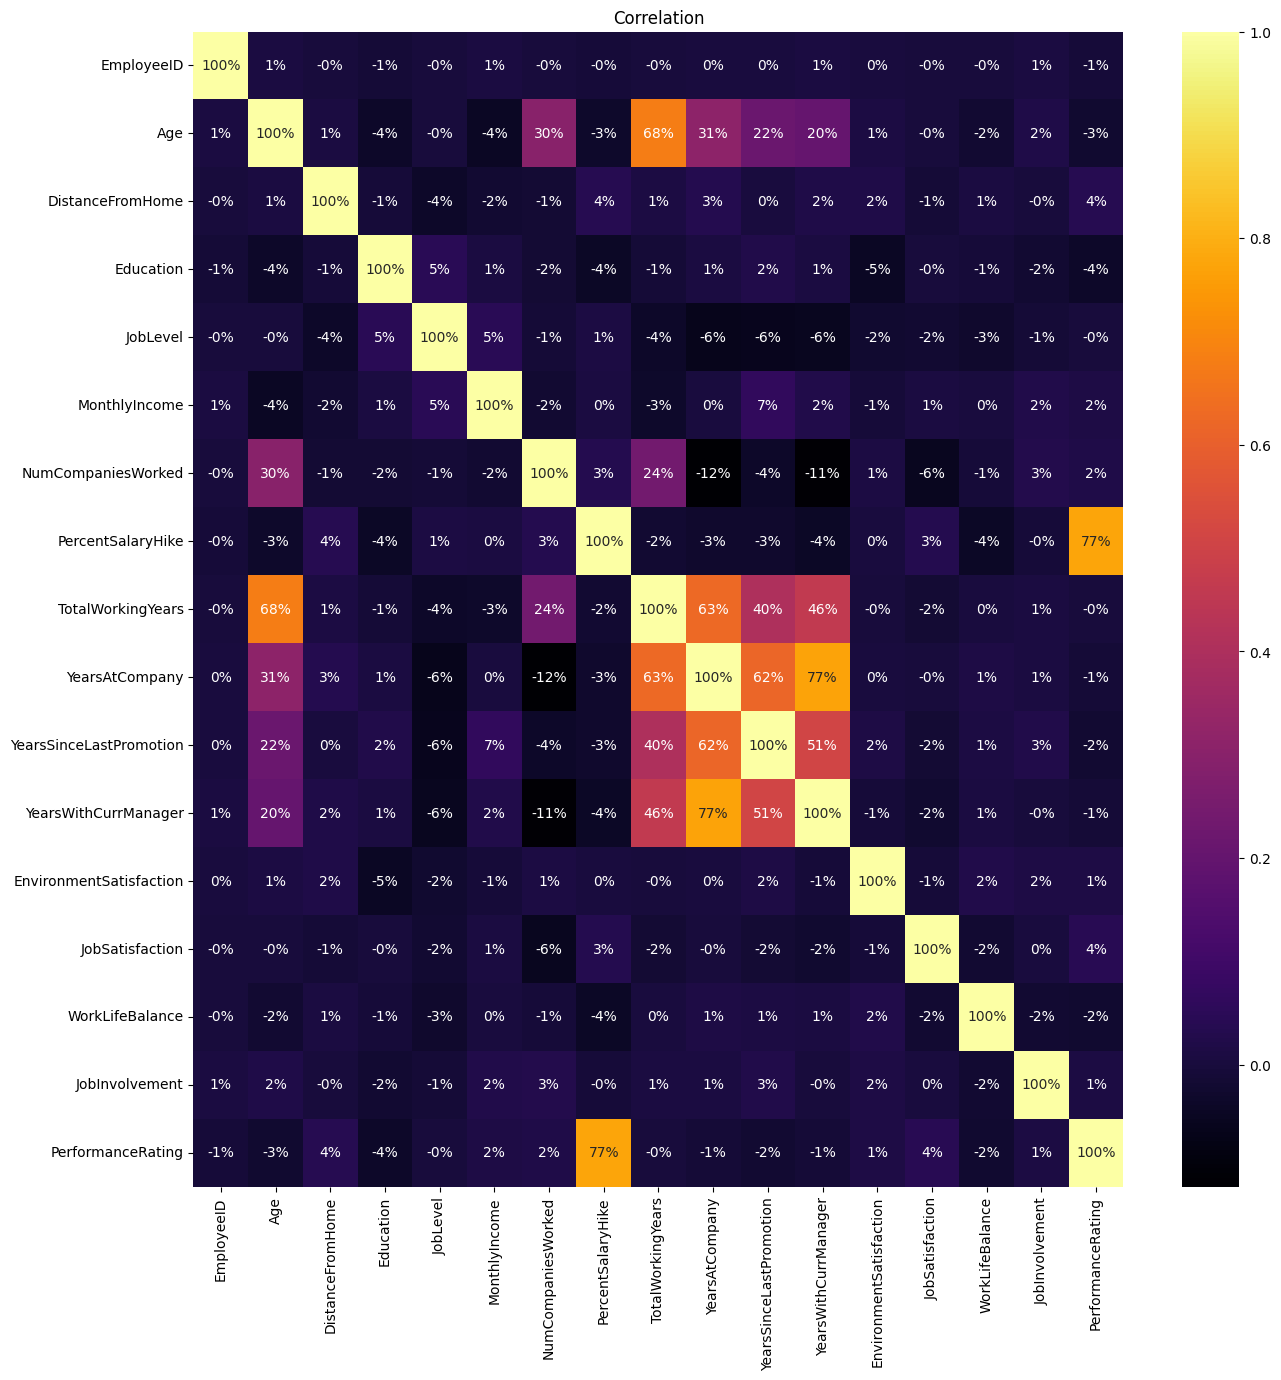

In [15]:
plt.figure(figsize=(15,15))
plt.title('Correlation')
sns.heatmap(correlation,
            annot=True,
            fmt='.0%',
            cmap='inferno'
            )

The heat map shows both, the Positive correlation and the Negative correlation.

The values which is between:

70% to 100% is having strong correlation .

50% to 70% is having moderate correlation.

30% to 50% is having weak correlation.

less than 30% is considered very weak correlation .

Negative correlation: A negative correlation indicates a negative relationship, where one variable tends to decrease as the other
increases.

## **Frequency Distribution**
Let's determine the frequency distribution for **categorical variables** such as Attrition , Gender ,
Department , Education Field , Job Role , and MaritalStatus

In [16]:
#Attrition Distribution
attrition_dist = round(df.Attrition.value_counts(normalize=True) * 100, 2)
print('\nAttrition Distribution(%):')
print(attrition_dist)

# Gender Distribution
gender_dist = round(df.Gender.value_counts(normalize=True) * 100, 2)
print('\nGender Distribution:')
print(gender_dist)

# Department Distribution
department_dist = round(df.Department.value_counts(normalize=True) * 100, 2)
print('\nDepartment Distribution:')
print(department_dist)

# Marital Status Distribution
marital_dist = round(df.MaritalStatus.value_counts(normalize=True) * 100, 2)
print('\nMarital Status Distribution:')
print(marital_dist)

# Education Field Distribution
education_dist = round(df.EducationField.value_counts(normalize=True) * 100, 2)
print('\nEducation Field Distribution:')
print(education_dist)

# Job Role Distribution
job_role_dist = round(df.JobRole.value_counts(normalize=True) * 100, 2)
print('\nJob Role Distribution:')
print(job_role_dist)


Attrition Distribution(%):
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

Gender Distribution:
Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

Department Distribution:
Department
Research & Development    65.37
Sales                     30.34
Human Resources            4.29
Name: proportion, dtype: float64

Marital Status Distribution:
MaritalStatus
Married     45.78
Single      31.97
Divorced    22.24
Name: proportion, dtype: float64

Education Field Distribution:
EducationField
Life Sciences       41.22
Medical             31.56
Marketing           10.82
Technical Degree     8.98
Other                5.58
Human Resources      1.84
Name: proportion, dtype: float64

Job Role Distribution:
JobRole
Sales Executive              22.18
Research Scientist           19.86
Laboratory Technician        17.62
Manufacturing Director        9.86
Healthcare Representative     8.91
Manager                       6.94
Sales Representative          5.65
Re

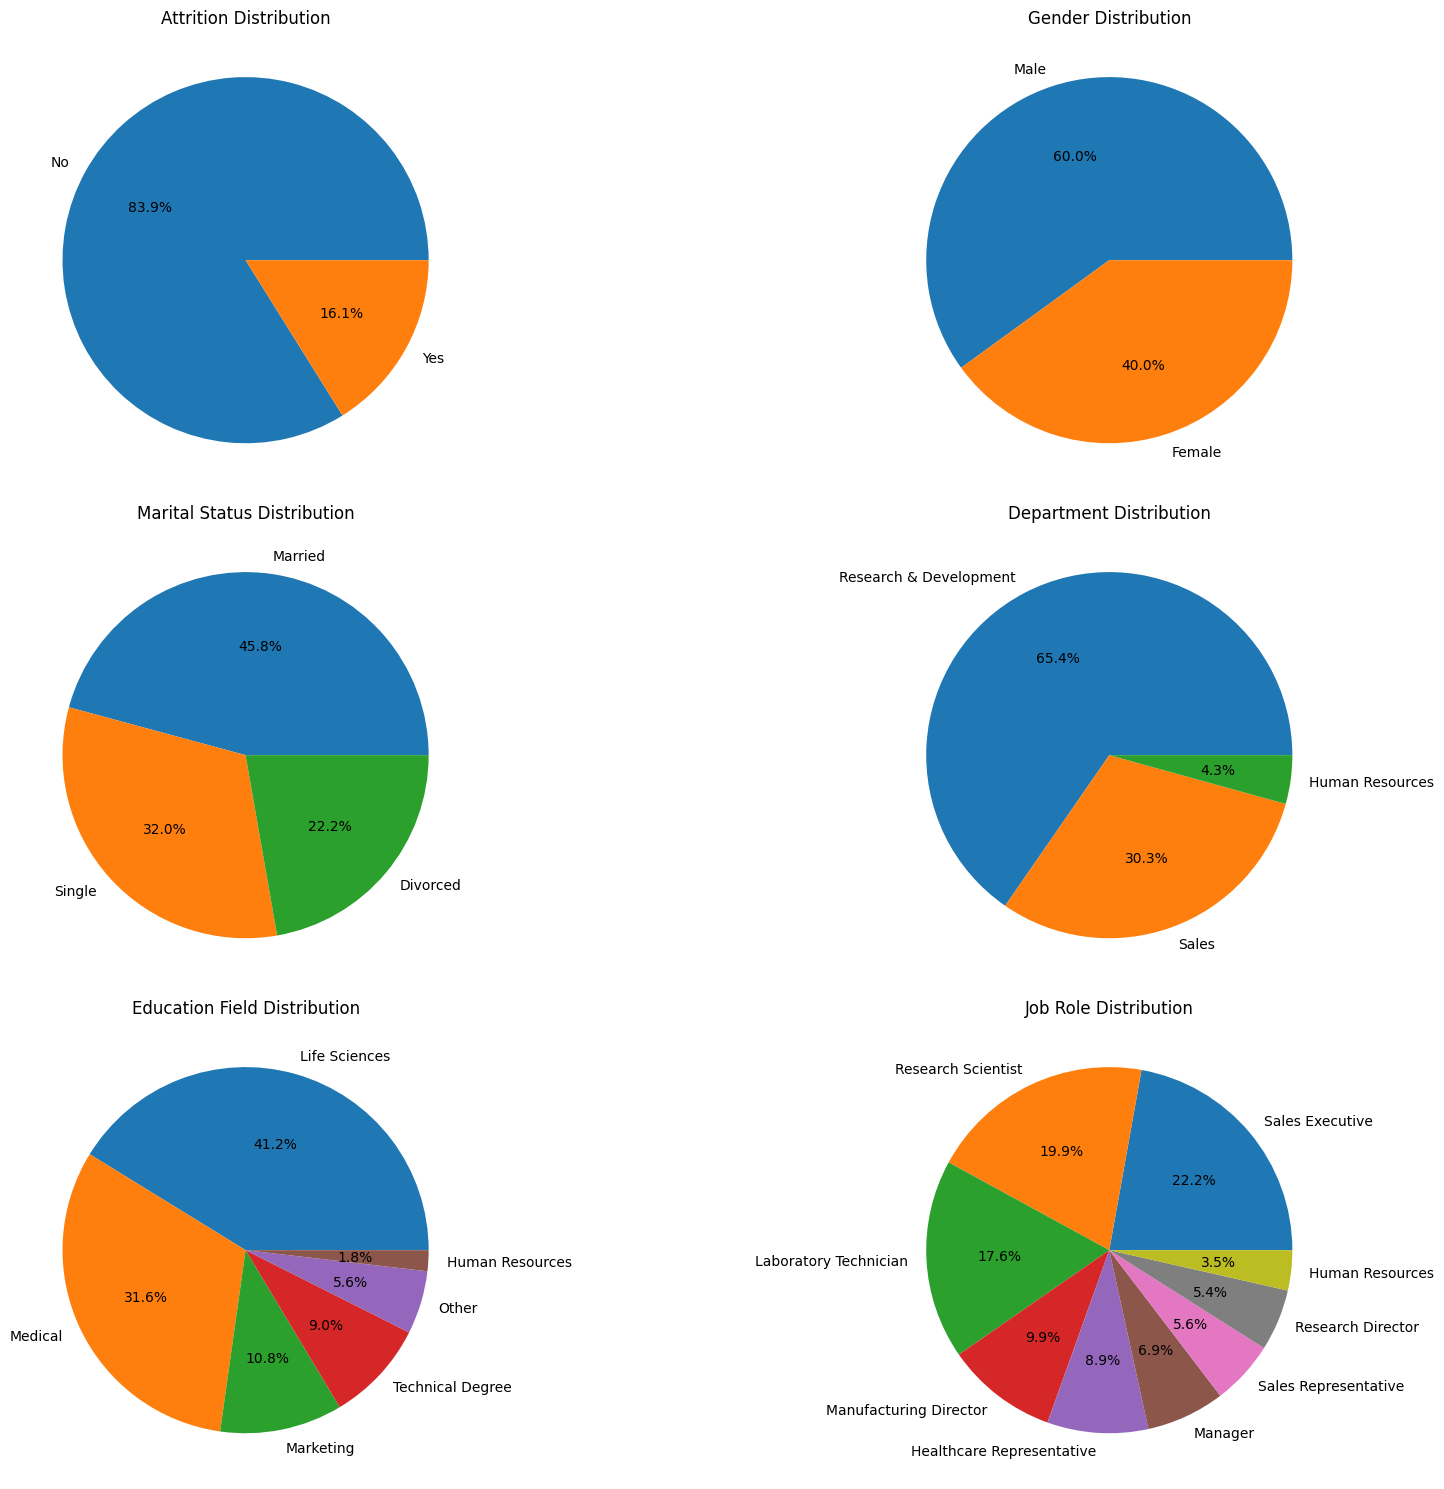

In [17]:
# Visualizing the Distributions
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
# Attrition
axes[0, 0].pie(attrition_dist, labels=attrition_dist.index, autopct='%1.1f%%')
axes[0, 0].set_title('Attrition Distribution');
# Gender
axes[0, 1].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
axes[0, 1].set_title('Gender Distribution');
# Marital Status
axes[1, 0].pie(marital_dist, labels=marital_dist.index, autopct='%1.1f%%')
axes[1, 0].set_title('Marital Status Distribution');
# Department
axes[1, 1].pie(department_dist, labels=department_dist.index, autopct='%1.1f%%')
axes[1, 1].set_title('Department Distribution');
# Education Field
axes[2, 0].pie(education_dist, labels=education_dist.index, autopct='%1.1f%%')
axes[2, 0].set_title('Education Field Distribution');
# Job Role
axes[2, 1].pie(job_role_dist, labels=job_role_dist.index, autopct='%1.1f%%')
axes[2, 1].set_title('Job Role Distribution');
plt.tight_layout()

**The frequency distribution visualization of various categorical columns reveals the following insights:**

1. 16% of employees have left the company, including those who resigned or were laid off.
2. The company employs 40% male and 60% female workers.
3. Approximately 46% of employees are married, 32% are single, and 22% are divorced.
4. The research and development department has the highest number of employees.
5. Over 70% of the company's employees have backgrounds in life sciences and medicine.
6. The company has a higher number of employees in roles such as sales executive, research scientist, and laboratory technician

## **Attrition by Gender**

In [ ]:
df.Gender.value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

In [ ]:
gender_count = df.groupby('Gender')['Attrition'].value_counts().unstack()
gender_count

Attrition,No,Yes
Gender,,
Female,1494,270
Male,2205,441


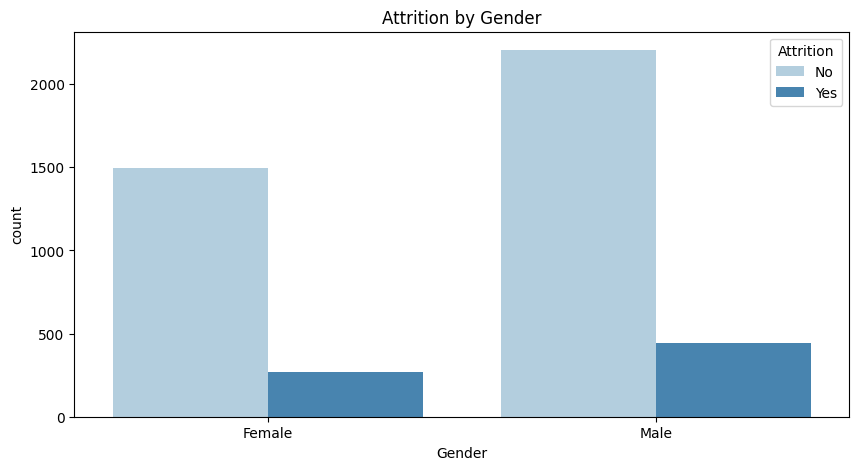

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Attrition by Gender')
sns.countplot(x='Gender',
hue='Attrition',
data=df,
palette='Blues',
linewidth=3);

In [ ]:
#Attrition percent in Male
print('Attrition percent in Male:', round(441*100/2646, 2), '%')
# Attrition percent in Female
print('Attrition percent in Female:', round(270*100/1764, 2), '%')

Attrition percent in Male: 16.67 %
Attrition percent in Female: 15.31 %


## **Attrition by Age**

<ipython-input-31-dd7d5b061b24>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.Age,


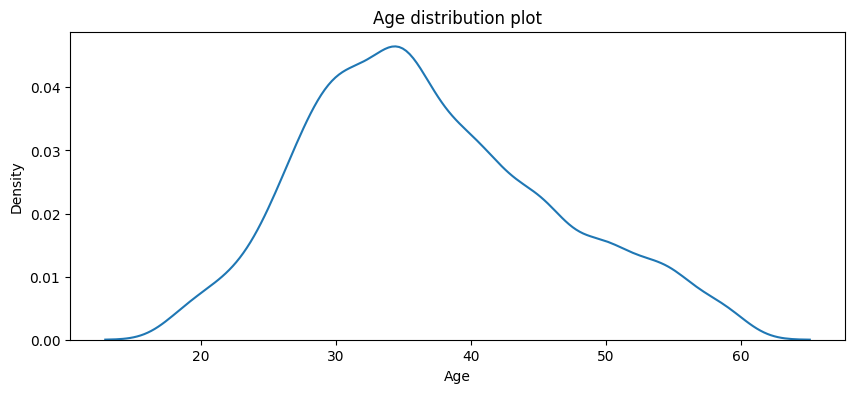

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Age distribution plot')
sns.distplot(x=df.Age,
hist=False)
plt.xlabel('Age');

most of the employees are in the range of 25-50 years of Age

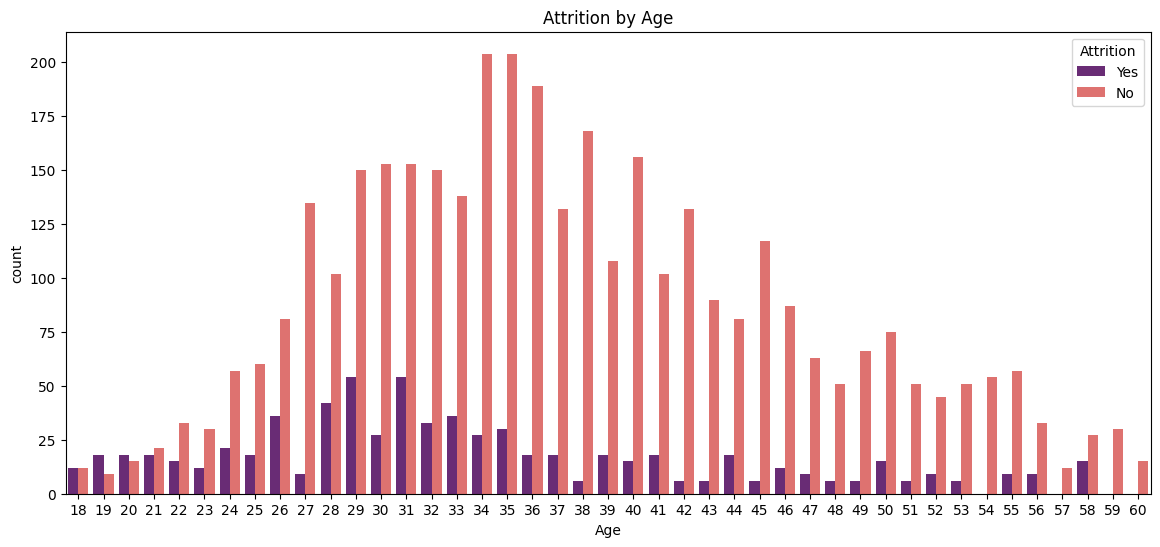

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Attrition by Age')
sns.countplot(x='Age',
hue='Attrition',
data=df,
palette='magma');

There is a noticeable peak in attrition among individuals aged 28-31, where the number of people leaving is significantly higher.
After the age of 31, the attrition rate generally decreases, suggesting increased job satisfaction or stability as employees grow older
or gain more experience.

These insights can be valuable for human resource strategies, indicating potential areas to focus on for retention efforts, particularly
among younger employees who are in the age range where attrition peaks

## **Attrition by Department**

In [ ]:
df.Department.value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

In [ ]:
df['count'] = 1
department_count = df.groupby(['Department', 'Attrition']).agg({"count":"sum"})
department_count

count
Department             Attrition       
Human Resources        No           132
                       Yes           57
Research & Development No          2430
                       Yes          453
Sales                  No          1137
                       Yes          201

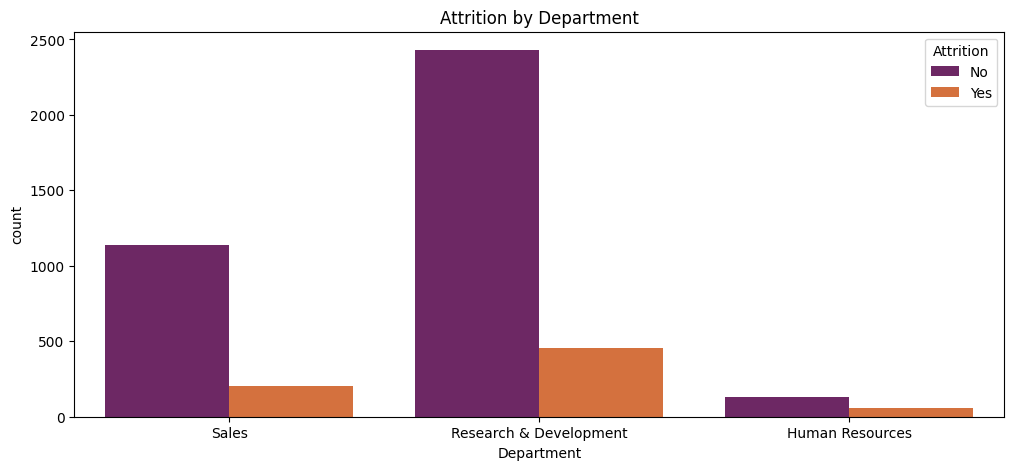

In [ ]:
#Visualization of attrition by department
plt.figure(figsize=(12,5))
plt.title("Attrition by Department")
sns.countplot(x='Department',
hue='Attrition',
palette='inferno',data=df);

The number of employees who left the company is high in R&D Department, this can be because the number of employees is high in
R&D department

## **Attrition by Employee job role**

In [ ]:
df.JobRole.value_counts()

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64

In [ ]:
jobrole_count = df.groupby('JobRole')['Attrition'].value_counts().unstack().sort_values(by='Yes', ascending=False)
jobrole_count

Attrition,No,Yes
JobRole,,
Sales Executive,813,165
Research Scientist,717,159
Laboratory Technician,651,126
Healthcare Representative,336,57
Research Director,183,57
Manufacturing Director,387,48
Manager,264,42
Sales Representative,213,36
Human Resources,135,21


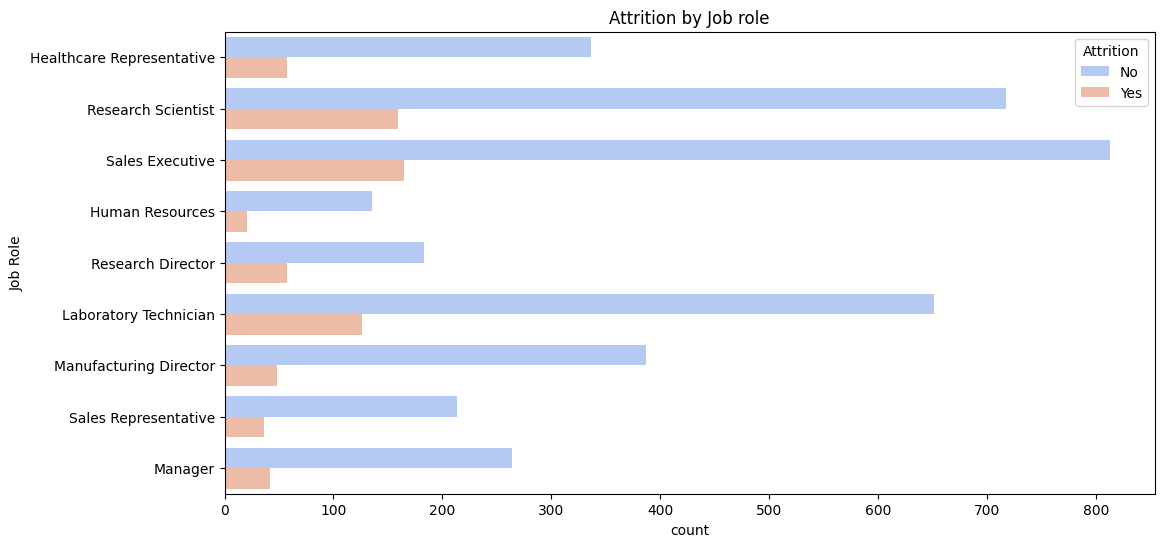

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Attrition by Job role')
sns.countplot(y='JobRole',
hue='Attrition',
data=df,
palette='coolwarm')
plt.ylabel('Job Role');

The number of employees who left the company is high in **Sales executive job role**, this can be because the number of employees is high in this job role.


In [ ]:
se_count = df[df['JobRole'] == 'Sales Executive'][df['Attrition'] == 'Yes'][['Gender','Age']]
se_count.head()

<ipython-input-40-6a13b2aa6de2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  se_count = df[df['JobRole'] == 'Sales Executive'][df['Attrition'] == 'Yes'][['Gender','Age']]


,Gender,Age
6,Male,28
38,Male,18
65,Male,28
164,Male,19
181,Female,31


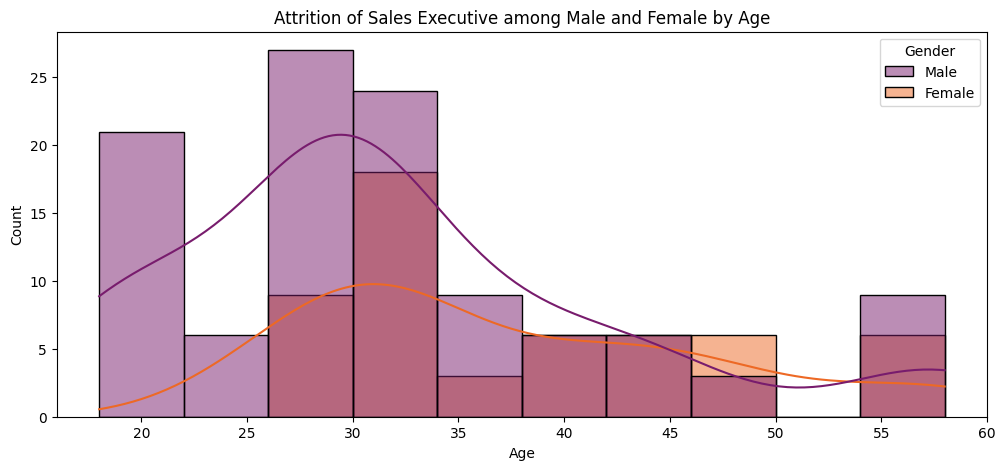

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Attrition of Sales Executive among Male and Female by Age')
sns.histplot(x=se_count.Age,
           hue=se_count.Gender,
           kde=True,
           bins=10,
          palette='inferno');

For Male sales executive, the spike range is between the age 15 -45. It might be related to career development opportunities, or other personal or professional factors.

## **Attrition by Monthly Income**

In [ ]:
income_counts = df.MonthlyIncome.value_counts().reset_index()
income_counts.columns = ['MonthlyIncome', 'Count']
income_counts

,MonthlyIncome,Count
0,23420,12
1,61420,9
2,27410,9
3,26100,9
4,23800,9
...,...,...
1344,120610,3
1345,56740,3
1346,96130,3
1347,69290,3


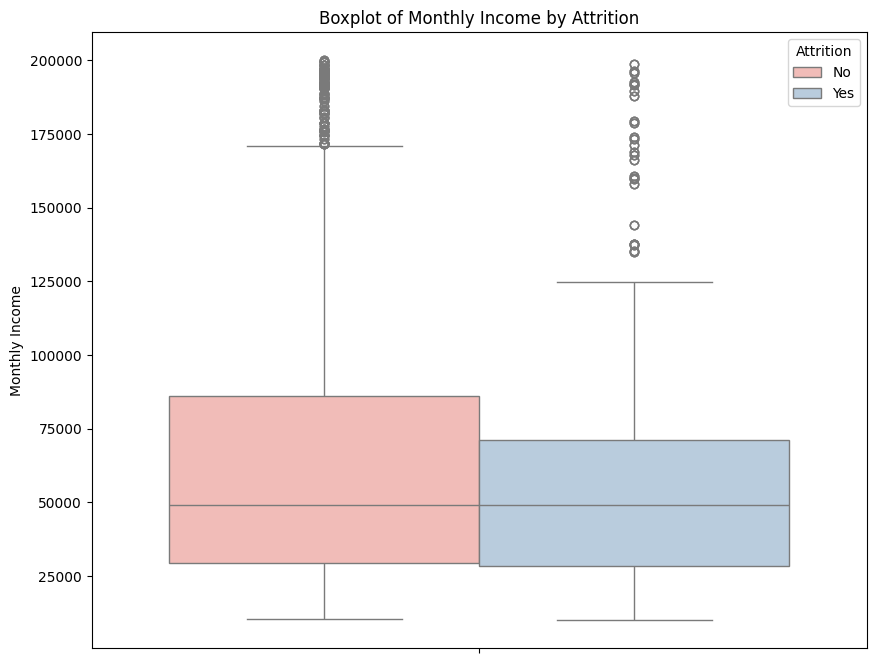

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Boxplot of Monthly Income by Attrition')
sns.boxplot(hue='Attrition',
y='MonthlyIncome',
data=df,
palette='Pastel1')
plt.ylabel('Monthly Income');

Median monthly income for the employees who have attrited is lower than than the median monthly income for the employees who
have not attrited. This means that the employees with lower monthly incomes are more likely to attrit (leave the comapny).

As per the analysis, it is evident that the monthly income of male Sales executive who have left the organization increases from the
age of 30 but gradually decreases from the age of 44.

This indicates that low monthly income could be one of the reasons for attrition
among Sales executive. However, in the case of female sales executive, the attrition rate is higher between the ages of 33 to 45
than that of male employees.
To understand the reasons behind this, we need to analyze more factors

## **Attrition by Environmental Satisfication**

In [ ]:
df.EnvironmentSatisfaction.value_counts()

EnvironmentSatisfaction
3.0    1350
4.0    1334
2.0     856
1.0     845
Name: count, dtype: int64

In [ ]:
satisfaction_rating = {1:'Poor',
2:'Below Average',
3:'Average',
4:'Good',
5:'Excellent'}

In [ ]:
df['Count'] = 1
env_satisfaction_gender = df.groupby(['EnvironmentSatisfaction', 'Gender']).agg({"Count":"sum"})
env_satisfaction_gender

Count
EnvironmentSatisfaction Gender       
1.0                     Female    297
                        Male      548
2.0                     Female    379
                        Male      477
3.0                     Female    539
                        Male      811
4.0                     Female    543
                        Male      791

In [ ]:
env_satisfaction_gender.groupby('Gender').sum()

,Count
Gender,
Female,1758
Male,2627


In [ ]:
environment_sat_gender = round(df.groupby('EnvironmentSatisfaction')[['Gender', 'Attrition']].value_counts().unstack())
environment_sat_gender

Attrition                        No  Yes
EnvironmentSatisfaction Gender          
1.0                     Female  219   78
                        Male    413  135
2.0                     Female  317   62
                        Male    411   66
3.0                     Female  476   63
                        Male    688  123
4.0                     Female  477   66
                        Male    678  113

### Male employee with poor environmental satisfication has the highest attrition in numbers.

## **Attrition by Year**

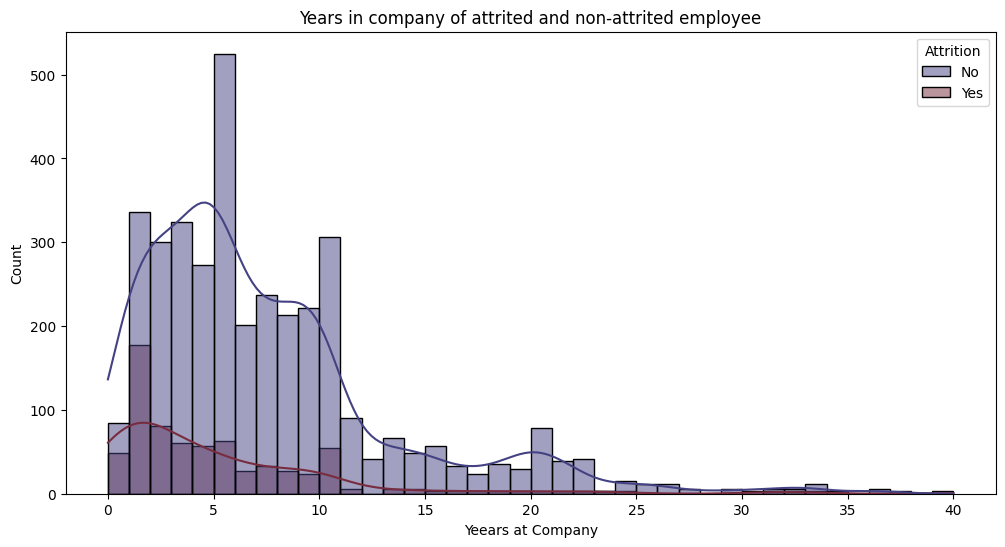

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Years in company of attrited and non-attrited employee')
sns.histplot(x='YearsAtCompany',
hue='Attrition',
data=df,
kde=True,
bins=40,
palette='icefire')
plt.xlabel('Yeears at Company');

It shows that employees who left the company had worked for approximately 2-3 years, which is indicated by the peak in the graph
at this point.

On the other hand, the histogram also indicates that employees who did not leave the company had worked for around 5-10 years.
This suggests that very few employees leave the company after this period

## **Attrition by MaritalStatus**

In [ ]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64

In [ ]:
df['count'] = 1
MaritalStatus_count = df.groupby(['MaritalStatus', 'Attrition']).agg({"count":"sum"})
MaritalStatus_count



count
MaritalStatus Attrition       
Divorced      No           882
              Yes           99
Married       No          1767
              Yes          252
Single        No          1050
              Yes          360

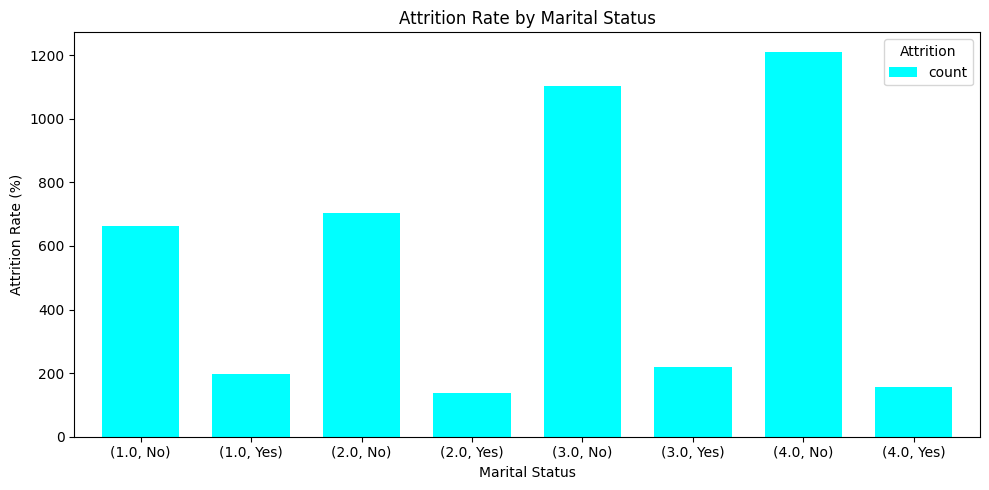

In [ ]:
# Visualization
MaritalStatus_count.plot(kind='bar',
stacked=True,color='cyan',
figsize=(10, 5),
width=0.7)
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout();

Upon analysis, it has been observed that the attrition rate is highest among single employees. This may be due to the fact that most of
the single employees are in the early stages of their careers and are more likely to seek out new opportunities.

On the other hand, married employees are found to have a lower attrition rate when compared to single employees. This could be
attributed to the need for stability in their jobs, as they may have additional responsibilities such as providing for their families.

Lastly, the attrition rate of divorced employees is significantly lower when compared to single and married employees. It is possible that
the number of divorced employees in the company is less than that of single and married employees, which could contribute to the lower
attrition rate.

### **Let's examine the relationship between Job Satisfaction,  Work-Life Balance, Performance Rating**

## **Attrition by Job Satisifaction**

In [ ]:
df['count'] = 1
JobSatisfaction_count = df.groupby(['JobSatisfaction', 'Attrition']).agg({"count":"sum"})
JobSatisfaction_count


count
JobSatisfaction Attrition       
1.0             No           663
                Yes          197
2.0             No           702
                Yes          138
3.0             No          1104
                Yes          219
4.0             No          1211
                Yes          156

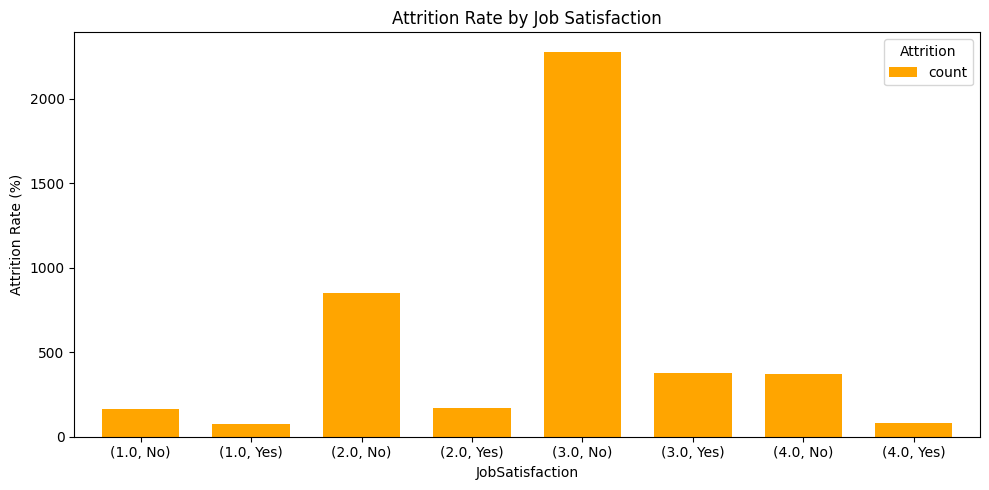

In [ ]:
# Visualization
JobSatisfaction_count.plot(kind='bar',
stacked=True,color='orange',
figsize=(10, 5),
width=0.7)
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout();

Employees who has below 4.0 rating job satisfaction has higher attrition.

## **Attrition by Work Life Balance**

In [ ]:
df['count'] = 1
WorkLifeBalance_count = df.groupby(['WorkLifeBalance', 'Attrition']).agg({"count":"sum"})
WorkLifeBalance_count

count
WorkLifeBalance Attrition       
1.0             No           164
                Yes           75
2.0             No           848
                Yes          171
3.0             No          2280
                Yes          380
4.0             No           373
                Yes           81

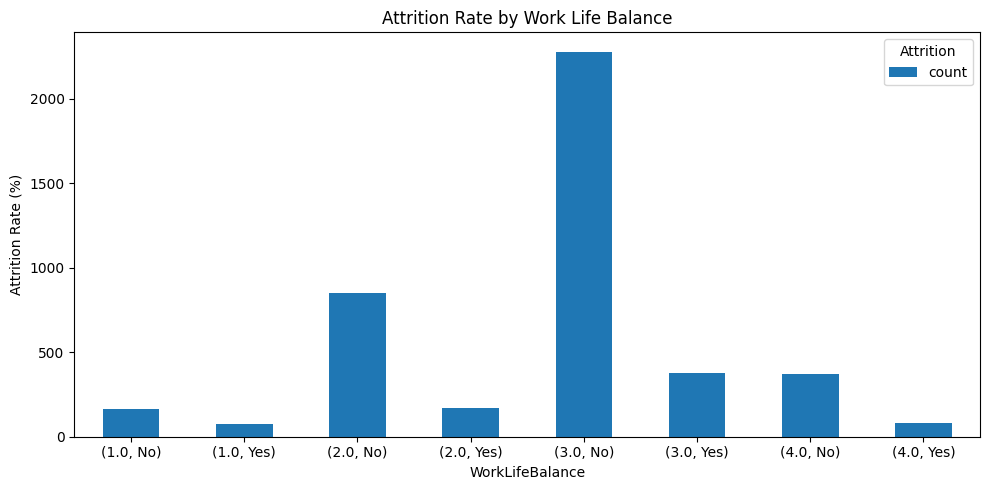

In [ ]:
# Visualization
WorkLifeBalance_count.plot(kind='bar',
stacked=True,
figsize=(10, 5))
plt.title('Attrition Rate by Work Life Balance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout();

## **Attrition by Performance Rating**

In [18]:
df['count'] = 1
PerformanceRating_count = df.groupby(['PerformanceRating', 'Attrition']).agg({"count":"sum"})
PerformanceRating_count

count
PerformanceRating Attrition       
3                 No          3144
                  Yes          588
4                 No           555
                  Yes          123

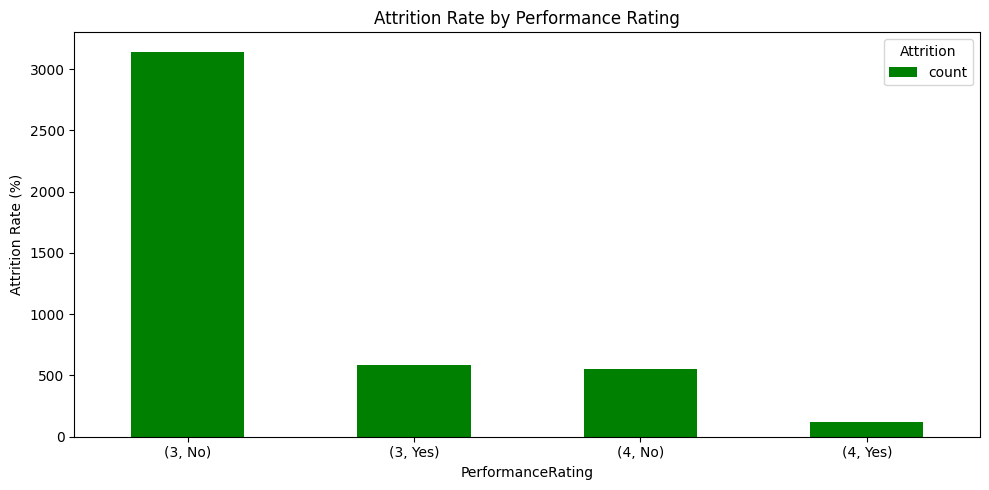

In [19]:
# Visualization
PerformanceRating_count.plot(kind='bar',color='green',
stacked=True,
figsize=(10, 5))
plt.title('Attrition Rate by Performance Rating')
plt.xlabel('PerformanceRating')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout();

**Overall Insights**

1. The attrition rate in the company is about 16%.
2. Of all employees, 40% are female and 60% are male.
3. Employees' ages range from 25 to 40 years old.
4. Approximately 46% of employees are married, 32% are single, and 22% are divorced.
5. R&D Department has the highest number of employees who have faced attrition.
6. The number of employees who left the company is high in Sales Executive job role.
6. Employees aged between 28-31 years have a significantly higher attrition rate, which decreases after the age of 31.

7. The company employees are dissatisfied with the company's environment.
